In [1]:
import os
import sys
import pickle
import pandas as pd
sys.path.append('../src/')
from utils_training import *
from utils_plotting import *
from utils_feature_selection import *
from utils_optimization import *
from configs import *
from functools import reduce
import itertools
from tqdm.notebook import tqdm

from matplotlib import rcParams
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
rcParams.update(fig_params)
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2

## Load data

In [2]:
key = ['ID', 'Sequence', 'CPP', 'Dataset']

features = ['physicochemical',
            'AAC',
            'CKSAAP type 1',
            'TPC type 1',
            'DPC type 1',
            'DDE',
            'GAAC',
            'CKSAAGP type 1',
            'GDPC type 1',
            'GTPC type 1',
            'Moran',
            'Geary',
            'NMBroto',
            'CTDC',
            'CTDT',
            'CTDD',
            'CTriad',
            'KSCTriad',
            'SOCNumber',
            'QSOrder',
            'PAAC',
            'APAAC',
            'ASDC',
            'AC',
            'CC',
            'ACC',
            'EAAC',
            'EGAAC',
            'AAIndex',
            'BLOSUM62',
            'ZScale'
           ]

selected_features = ['CTDC_charge.G1',
                     'CTDD_hydrophobicity_ARGP820101.1.residue50',
                     'SOCNumber_gGrantham.lag1',
                     'DDE_LA',
                     'Geary_ANDN920101.lag2',
                     'DDE_SP',
                     'NetC',
                     'ASDC_VG',
                     'CTDC_solventaccess.G3',
                     'APAAC_Pc1.V']

In [3]:
dfList = []
features_dict = {}

for feature in features:
    tmp = pd.read_pickle(os.path.join('..', 'features', 'comb_' + feature.split(' ')[0] + '.pickle'))
    features_dict[feature] = list(set(tmp.columns.tolist()) - set(key))
    dfList.append(tmp)
    
comb = reduce(lambda df1, df2: pd.merge(df1, df2, on=['ID', 'Sequence', 'CPP', 'Dataset']), dfList)

train = comb[comb.Dataset=='train'].copy()
test  = comb[comb.Dataset=='test'].copy()

features = sorted(list(itertools.chain.from_iterable(list(features_dict.values()))))
print(f'Features number: {len(features)}')

Features number: 13833


In [4]:
featurizer = Featurizer(data_folder=os.path.join('..', 'data'))

comb_selected = pd.DataFrame(comb.Sequence.apply(lambda x: featurizer.compute_features(x).values[0]).tolist(), index= comb.index, columns=selected_features)
comb_selected[key] = comb[key]
comb_selected = comb_selected[key+selected_features].copy()
comb_selected.head()

,ID,Sequence,CPP,Dataset,CTDC_charge.G1,CTDD_hydrophobicity_ARGP820101.1.residue50,SOCNumber_gGrantham.lag1,DDE_LA,Geary_ANDN920101.lag2,DDE_SP,NetC,ASDC_VG,CTDC_solventaccess.G3,APAAC_Pc1.V
0,Positive_1,GRKGKHKRKKLP,1,train,0.583333,8.333333,6637.454545,-0.267225,1.207187,-0.267225,7.029472,0.000000,0.166667,0.000000
1,Positive_2,KFLNRFWHWLQLKPGQPMY,1,train,0.157895,57.894737,8580.166667,-0.341835,0.626096,-0.341835,3.029570,0.000000,0.263158,0.000000
2,Positive_3,RRRRRRRRRGPGVTWTPQAWFQWV,1,train,0.375000,58.333333,6333.391304,-0.386407,0.805930,-0.386407,8.994831,0.000000,0.166667,1.703606
3,Positive_4,AEKVDPVKLNLTLSAAAEALTGLGDK,1,train,0.115385,53.846154,11200.000000,-0.402857,0.912634,-0.402857,-1.005546,0.012308,0.153846,2.020491
4,Positive_5,GLKKLARLFHKLLKLGC,1,train,0.294118,5.882353,10267.875000,2.800695,1.021408,-0.322286,4.887885,0.000000,0.058824,0.000000


In [5]:
comb[key+selected_features].head()

,ID,Sequence,CPP,Dataset,CTDC_charge.G1,CTDD_hydrophobicity_ARGP820101.1.residue50,SOCNumber_gGrantham.lag1,DDE_LA,Geary_ANDN920101.lag2,DDE_SP,NetC,ASDC_VG,CTDC_solventaccess.G3,APAAC_Pc1.V
0,Positive_1,GRKGKHKRKKLP,1,train,0.583333,8.333333,6637.454545,-0.267225,1.207187,-0.267225,7.029472,0.000000,0.166667,0.000000
1,Positive_2,KFLNRFWHWLQLKPGQPMY,1,train,0.157895,57.894737,8580.166667,-0.341835,0.626096,-0.341835,3.029570,0.000000,0.263158,0.000000
2,Positive_3,RRRRRRRRRGPGVTWTPQAWFQWV,1,train,0.375000,58.333333,6333.391304,-0.386407,0.805930,-0.386407,8.994831,0.000000,0.166667,1.703606
3,Positive_4,AEKVDPVKLNLTLSAAAEALTGLGDK,1,train,0.115385,53.846154,11200.000000,-0.402857,0.912634,-0.402857,-1.005546,0.012308,0.153846,2.020491
4,Positive_5,GLKKLARLFHKLLKLGC,1,train,0.294118,5.882353,10267.875000,2.800695,1.021408,-0.322286,4.887885,0.000000,0.058824,0.000000


In [6]:
print(comb[key+selected_features].equals(comb_selected))

True


In [7]:
train_selected = comb_selected[comb_selected.Dataset=='train'].copy()
test_selected  = comb_selected[comb_selected.Dataset=='test'].copy()

Training until validation scores don't improve for 20 rounds
[100]	cv_agg's train auc: 0.918468 + 0.00288423	cv_agg's valid auc: 0.903734 + 0.0230787
[200]	cv_agg's train auc: 0.927793 + 0.00260694	cv_agg's valid auc: 0.910334 + 0.0224967
[300]	cv_agg's train auc: 0.93379 + 0.00272265	cv_agg's valid auc: 0.913786 + 0.0219653
[400]	cv_agg's train auc: 0.937791 + 0.00265479	cv_agg's valid auc: 0.916347 + 0.0217603
[500]	cv_agg's train auc: 0.940591 + 0.00258033	cv_agg's valid auc: 0.918114 + 0.022279
[600]	cv_agg's train auc: 0.942788 + 0.00245492	cv_agg's valid auc: 0.919151 + 0.0214421
[100]	training's auc: 0.917791	valid_1's auc: 0.912864
[200]	training's auc: 0.926656	valid_1's auc: 0.915841
[300]	training's auc: 0.932587	valid_1's auc: 0.916444
[400]	training's auc: 0.936803	valid_1's auc: 0.916963
[500]	training's auc: 0.939771	valid_1's auc: 0.917334


,AUROC,MCC,F1,Fb05,Fb01,ACC,SN,SP
fold,,,,,,,,
OOF,0.919335,0.661596,0.769125,0.881261,0.971489,0.809802,0.635178,0.984332
Test_ensemble,0.918296,0.625630,0.649007,0.667575,0.679901,0.954720,0.620253,0.978928
Test_refit,0.916021,0.622788,0.647059,0.660000,0.668472,0.953866,0.626582,0.977554


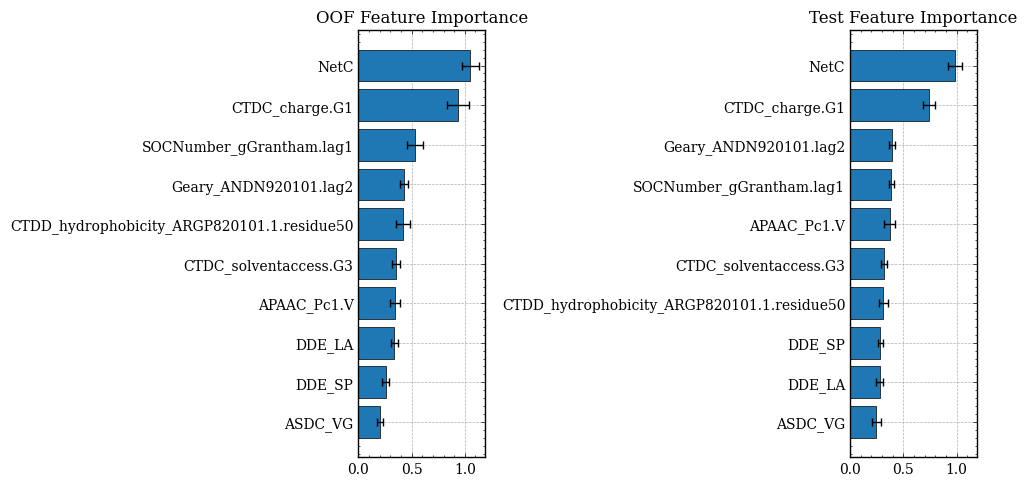

In [8]:
oof_results, test_results = cross_validate(train=train_selected,
                                           test=test_selected,
                                           features=selected_features,
                                           target=TARGET,
                                           num_folds=NUM_FOLDS,
                                           num_repeats=NUM_REPEATS,
                                           seed=SEED,
                                           params={**PARAMS_GB, **{'scale_pos_weight': 0.1, 'num_leaves': 2}},
                                           threshold=0.5,
                                           feval=None,
                                           refit=True,
                                           compute_oof_importance=True,
                                           compute_test_importance=True)
print_results(oof_results, test_results)
plot_importance(oof_results, test_results, selected_features, max_features=20)

In [9]:
## Save models
d = {'models_ensemble': oof_results['models'], 'models_refit': test_results['models'],
     'best_iteration': oof_results['best_iteration']}
with open(os.path.join('..', 'models', 'efficient_model.pickle'), 'wb') as handle:
    pickle.dump(d, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [10]:
## Load saved models
with open(os.path.join('..', 'models', 'efficient_model.pickle'), 'rb') as handle:
    models = pickle.load(handle)

In [14]:
oof_results, test_results = evaluate(train=train_selected,
                                     test=test_selected,
                                     oof_results=models['models_ensemble'],
                                     test_results=models['models_refit'],
                                     features=selected_features,
                                     target=TARGET,
                                     num_folds=NUM_FOLDS,
                                     num_repeats=NUM_REPEATS,
                                     seed=SEED,
                                     compute_oof_importance=True,
                                     compute_test_importance=True)
print_results(oof_results, test_results)
plot_importance(oof_results, test_results, selected_features, max_features=20)

TypeError: 'CVBooster' object is not subscriptable

In [13]:
oof_results['models']

## Test models

In [17]:
test_sequences = ['KQRNRWEWRPDFKSKKVKISLPC',
                  'KKKKKKKKLLLLLLLL',
                  'LKLKLKLKLKLKLKLK',
                  'GAGKKKAKPAARPNV',
                  'QRNFKA',
                  'RNSYRKSPSRRNR',
                  'GWVIVVGVIGVI',
                  'AGLVLAALLVT']

featurizer = Featurizer(data_folder=os.path.join('..', 'data'))
best_iteration = models['best_iteration']

preds_dict = {}
n_models = len(models['models'].boosters)

for sequence in test_sequences:
    features_df = featurizer.compute_features(sequence)
    preds = 0.0
    for model in models['models'].boosters:
        preds += model.predict(features_df[selected_features], num_iteration=best_iteration) / n_models
    preds_dict[sequence] = preds

In [18]:
preds_dict

{'KQRNRWEWRPDFKSKKVKISLPC': array([0.48625468]),
 'KKKKKKKKLLLLLLLL': array([0.99983108]),
 'LKLKLKLKLKLKLKLK': array([0.99406937]),
 'GAGKKKAKPAARPNV': array([0.7007129]),
 'QRNFKA': array([0.28826399]),
 'RNSYRKSPSRRNR': array([0.93518519]),
 'GWVIVVGVIGVI': array([0.2432096]),
 'AGLVLAALLVT': array([0.5877668])}